In [141]:
import sys
!{sys.executable} -m pip install requests markupsafe pyyaml pandas seaborn

Defaulting to user installation because normal site-packages is not writeable


In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
# save filepath to variable for easier access
melbourne_file_path = "melb_data.csv"
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path)
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [144]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Data preprocessing and visualization

In [145]:
melbourne_data = melbourne_data.dropna(axis=0)

melbourne_data["Suburb_numerized"] = melbourne_data["Suburb"].astype("category").cat.codes
melbourne_data["CouncilArea_numerized"] = melbourne_data["CouncilArea"].astype("category").cat.codes
melbourne_data["Regionname_numerized"] = melbourne_data["Regionname"].astype("category").cat.codes
melbourne_data["Type_numerized"] = melbourne_data["Type"].astype("category").cat.codes
melbourne_data["Method_numerized"] = melbourne_data["Method"].astype("category").cat.codes

melbourne_data.drop(["Address", "SellerG", "Suburb", "CouncilArea", "Regionname", "Type", "Method", "Date"], axis=1, inplace=True)


<AxesSubplot: >

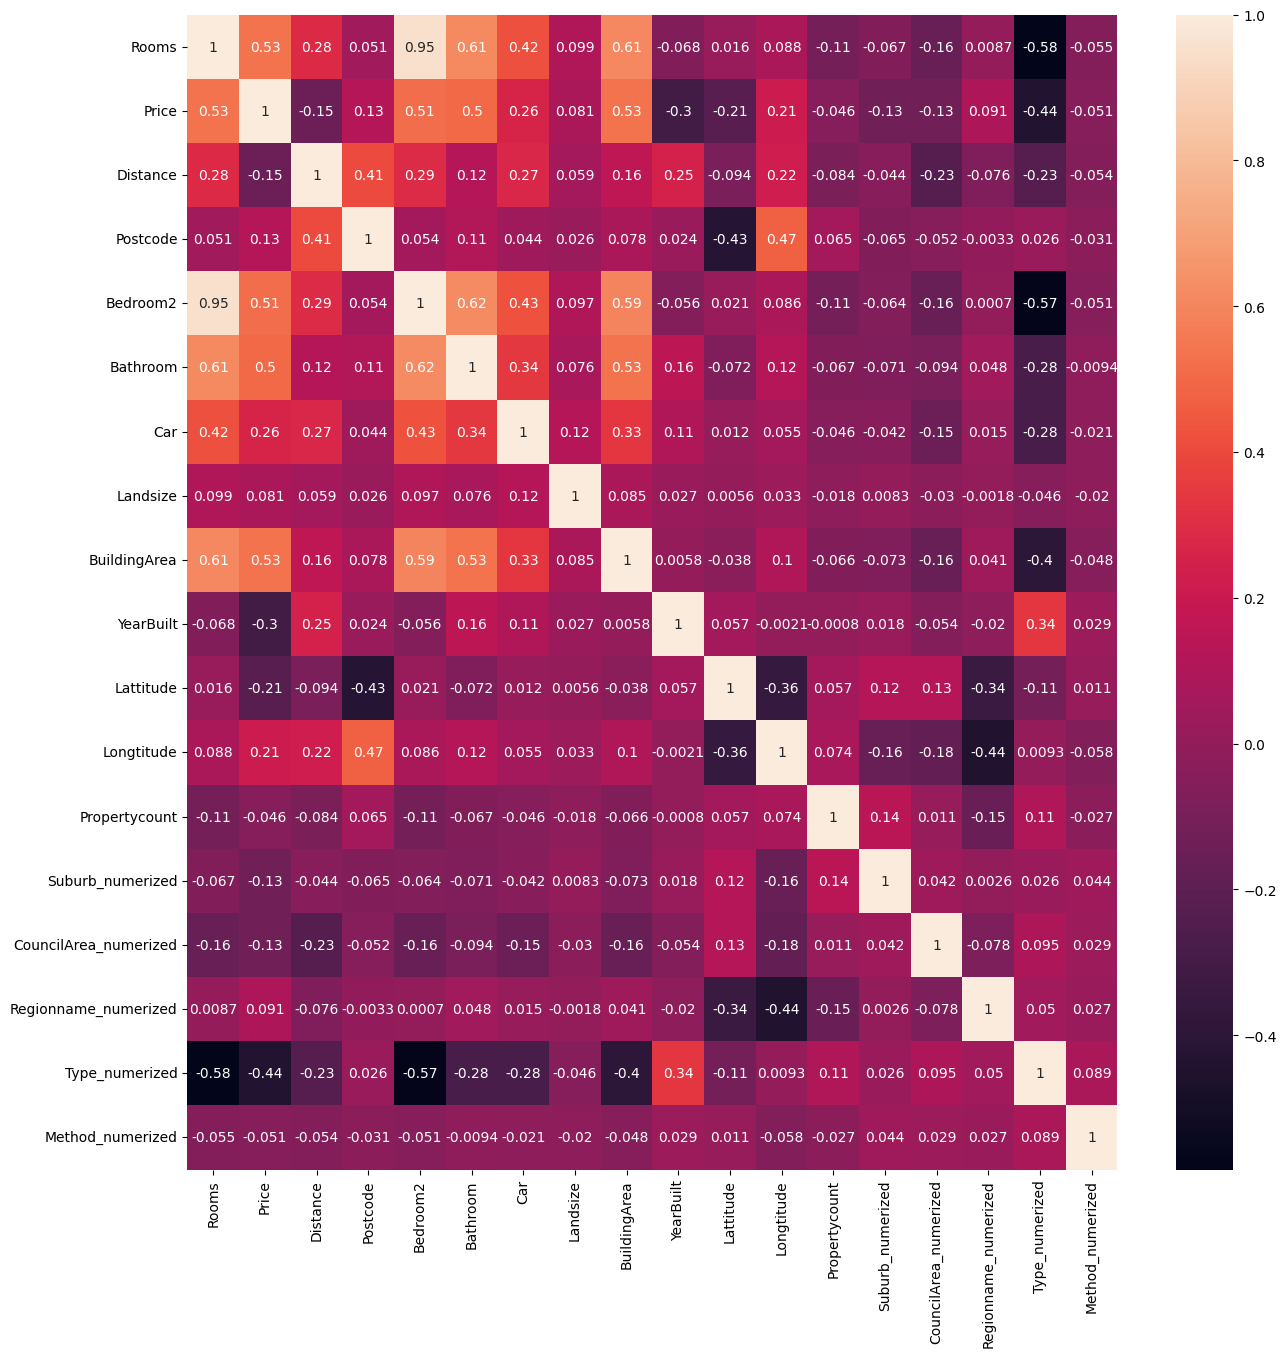

In [146]:
fig, ax = plt.subplots(figsize=(15,15))

corr = melbourne_data.corr()
sns.heatmap(corr, annot=True, )

## Experiments with models

In [147]:
y = melbourne_data.Price

In [148]:
melbourne_features = ["Rooms", "Bedroom2", "Bathroom", "BuildingArea", "Car", "Landsize", "YearBuilt", "Suburb_numerized", "CouncilArea_numerized", "Regionname_numerized", "Type_numerized", "Method_numerized"]

In [149]:
X = melbourne_data[melbourne_features]

In [150]:
X.describe()

,Rooms,Bedroom2,Bathroom,BuildingArea,Car,Landsize,YearBuilt,Suburb_numerized,CouncilArea_numerized,Regionname_numerized,Type_numerized,Method_numerized
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,2.902034,1.576340,141.568645,1.573596,471.006940,1964.081988,141.733376,14.678502,3.824403,0.583280,1.437218
std,0.971079,0.970055,0.711362,90.834824,0.929947,897.449881,38.105673,83.202191,9.217256,1.986514,0.853992,1.142938
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,91.000000,1.000000,152.000000,1940.000000,64.000000,6.000000,2.000000,0.000000,1.000000
50%,3.000000,3.000000,1.000000,124.000000,1.000000,373.000000,1970.000000,141.000000,16.000000,5.000000,0.000000,1.000000
75%,4.000000,3.000000,2.000000,170.000000,2.000000,628.000000,2000.000000,214.250000,22.000000,5.000000,1.000000,1.000000
max,8.000000,9.000000,8.000000,3112.000000,10.000000,37000.000000,2018.000000,286.000000,30.000000,7.000000,2.000000,4.000000


In [151]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [152]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bedroom2  Bathroom  BuildingArea  Car  Landsize  YearBuilt  \
1      2       2.0       1.0          79.0  0.0     156.0     1900.0   
2      3       3.0       2.0         150.0  0.0     134.0     1900.0   
4      4       3.0       1.0         142.0  2.0     120.0     2014.0   
6      3       4.0       2.0         210.0  0.0     245.0     1910.0   
7      2       2.0       1.0         107.0  2.0     256.0     1890.0   

   Suburb_numerized  CouncilArea_numerized  Regionname_numerized  \
1                 0                     29                     2   
2                 0                     29                     2   
4                 0                     29                     2   
6                 0                     29                     2   
7                 0                     29                     2   

   Type_numerized  Method_numerized  
1               0                 1  
2               0                 3

In [153]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

124.75790832795352

In [154]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

274402.10393802455


In [155]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [156]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  350019
Max leaf nodes: 50  		 Mean Absolute Error:  262022
Max leaf nodes: 500  		 Mean Absolute Error:  260795
Max leaf nodes: 5000  		 Mean Absolute Error:  274445


In [157]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

207423.38644932216
